## Monte Carlo Simulation with Python

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark-palette') 
import yfinance as yf 
np.random.seed(0)
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
num_assets = 3 
assets = ['AAPL','RIL','MSFT'] 
expected_returns = [0.12,0.15,0.18] 
std_deviations = [0.18,0.22,0.25] 
num_sims = 1000

#### Save simulation results and calculate portfolio returns as well as volatility

Initialize arrays to save simulation results

In [3]:
simulation_results = np.zeros((num_sims,num_assets)) 
portfolio_returns = np.zeros(num_sims) 
portfolio_volatility = np.zeros(num_sims) 

Monte Carlo Simulation

In [4]:
for i in range(num_sims):
    weights = np.random.random(num_assets) 
    weights/=np.sum(weights) 
    portfolio_return = np.sum(weights*expected_returns) 
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(np.diag(std_deviations),weights)))
    simulation_results[i,:] = weights 
    portfolio_returns[i] = portfolio_return 
    portfolio_volatility[i] = portfolio_std_dev

Calculate Annualised Sharpe Ratio

In [5]:
portfolio_df = pd.DataFrame({'Return':portfolio_returns,'Volatility':portfolio_volatility}) 

risk_free_rate = 0.03 
sharpe_arr = (portfolio_returns-risk_free_rate)/portfolio_volatility 

max_sr_idx = sharpe_arr.argmax() 

Retrieve optimal weights and corresponding return and volatility

In [6]:
optimal_weights = simulation_results[max_sr_idx] 
optimal_return = portfolio_returns[max_sr_idx] 
optimal_volatility = portfolio_volatility[max_sr_idx] 

# Calculate Sharpe ratio at the maximum point
MC_SR = sharpe_arr[max_sr_idx] 

# Calculate annualized Sharpe Ratio
SR_annualized = MC_SR*np.sqrt(12) 

#### Plot efficient frontier to find out the optimal portfolio point

Plot the markowitz efficient frontier

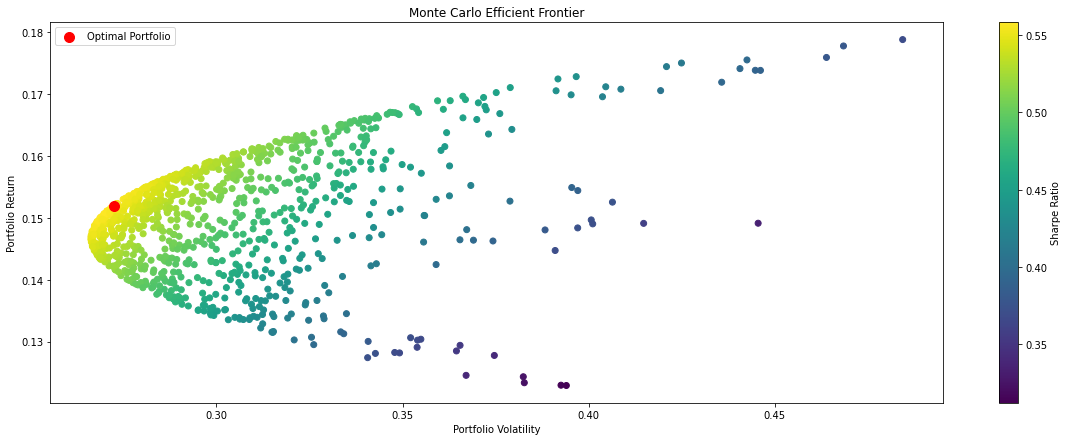

In [7]:
plt.figure(figsize=(20,7))
plt.scatter(portfolio_df['Volatility'],portfolio_df['Return'],c=portfolio_df['Return']/portfolio_df['Volatility'],marker='o') 
plt.title('Monte Carlo Efficient Frontier')
plt.xlabel('Portfolio Volatility') 
plt.ylabel('Portfolio Return') 
plt.colorbar(label='Sharpe Ratio') 

# Add a red dot for the optimal portfolio
plt.scatter(optimal_volatility,optimal_return,color='red',marker='o',s=100,label='Optimal Portfolio') 
plt.legend() 
plt.axis(True) 
plt.show() 

In [8]:
print('Optimal Portfolio Weights : ',optimal_weights) 
print('Optimal Portfolio Return : ',optimal_return)
print('Optimal Portfolio Volatility : ',optimal_volatility) 
print('Max Sharpe Ratio : ',MC_SR) 
print('MAx Annualized Sharpe Ratio : ',SR_annualized) 

Optimal Portfolio Weights :  [0.29892589 0.33787509 0.36319902]
Optimal Portfolio Return :  0.15192819374252003
Optimal Portfolio Volatility :  0.2723558195171731
Max Sharpe Ratio :  0.4476797813928554
MAx Annualized Sharpe Ratio :  1.5508082537875072


### Predicting expected returns, variance and worst-case scenarios

In [9]:
import numpy.random as nrand 
import math 

In [10]:
S = 1000000
T = 252 
mu = 1.92246 
vol = 0.86123

In [11]:
result = [] 
for i in range(1000):
    daily_returns = np.random.normal(mu/T,vol/math.sqrt(T),T)+1 

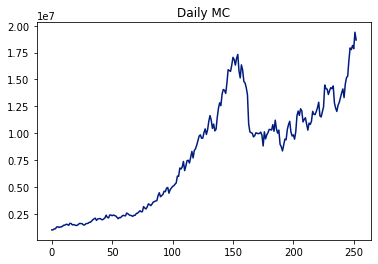

In [12]:
price_list = [S] 

for x in daily_returns:
    price_list.append(price_list[-1]*x)
    result.append(price_list[-1]) 
plt.plot(price_list)
plt.title('Daily MC') 
plt.show()

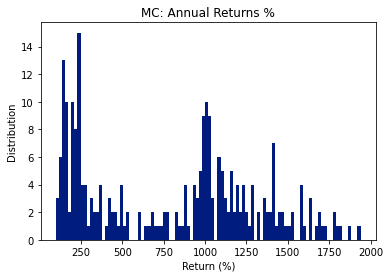

Mean return %: 795.2700323753638
Median return %: 935.3549495482828
Min return %: 100.0984067293988
Max return %: 1939.397457582917
Standard Deviation %: 508.792660575596


In [13]:
res = [i/S*100 for i in result]
stdev_percentage = np.std(res)

plt.title('MC: Annual Returns %')
plt.xlabel('Return (%)')
plt.ylabel('Distribution')
plt.hist(res,bins=100)
plt.show()


print('Mean return %:',np.mean(res))
print('Median return %:',np.median(res))
print('Min return %:',np.min(res))
print('Max return %:',np.max(res))
print('Standard Deviation %:', stdev_percentage)

In [14]:
from scipy import stats
from statistics import stdev

print('Mean:',np.mean(result))
print('Mean Ret:',np.mean(result)/S*100)
print('Median:',np.median(result))
print('Median Ret:',np.median(result)/S*100)
print('Min:',np.min(result))
print('Min Ret:',np.min(result)/S*100)
print('Max:',np.max(result))
print('Max Ret:',np.max(result)/S*100)

# print('Mode:',stats.mode(result))
print('Stdev', stdev(result))
mc_mu = np.mean(result)
med = np.median(result)
mc_min = np.min(result)
mx = np.max(result)
std = stdev(result)
metrics = [mc_mu,med,mc_min,mx]

print('sharpe:',mu/vol)
print('5% Quantile',np.percentile(result,5))
print('5% Quantile %',np.percentile(result,5)/S*100)
print('95% Quantile',np.percentile(result,95))
print('95% Quantile %',np.percentile(result,95)/S*100)

Mean: 7952700.323753637
Mean Ret: 795.2700323753637
Median: 9353549.495482828
Median Ret: 935.3549495482829
Min: 1000984.0672939881
Min Ret: 100.0984067293988
Max: 19393974.57582917
Max Ret: 1939.397457582917
Stdev 5098051.842846875
sharpe: 2.2322260023454827
5% Quantile 1444891.3778433383
5% Quantile % 144.48913778433382
95% Quantile 16334665.43094313
95% Quantile % 1633.466543094313
